<a href="https://colab.research.google.com/github/MahdieRah/Protein_Feature_Extraction/blob/main/game_of_life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import time
from  IPython.display import clear_output
from time import sleep
import random

In [ ]:
universe = np.zeros((100, 100))
for i in [random.randint(30 , 70) for  _ in range (20)]:
    for j in [random.randint(40 , 60) for _ in range (20)]:
        universe[i, j] = 1

In [ ]:
def find_neighbors(cell_ind: tuple , universe: np.array):
    num_neighbors = 0
    l0 = universe.shape[0]
    l1 = universe.shape[1]

    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            if  (i!=0) or (j!=0):
                if cell_ind[0] + i == l0:
                    i = - cell_ind[0]
                if cell_ind[1] + j == l1:
                    j = - cell_ind[1]
                if universe[cell_ind[0] +i , cell_ind[1] + j] == 1:
                    num_neighbors += 1

    return num_neighbors

In [ ]:
def pass_time (universe):
    num_neighbors_map = np.zeros(universe.shape)

    for i in range(universe.shape[0]):
        for  j in range(universe.shape[1]):
              num_neighbors_map[i,j] = find_neighbors((i,j) , universe)
    new_universe = np.zeros(universe.shape)
    surviors = (universe ==1) & (num_neighbors_map ==2) | (num_neighbors_map ==3)
    zombies = (universe ==0) & (num_neighbors_map ==3)
    new_universe = (surviors ==1) | (zombies == 1)
    return new_universe

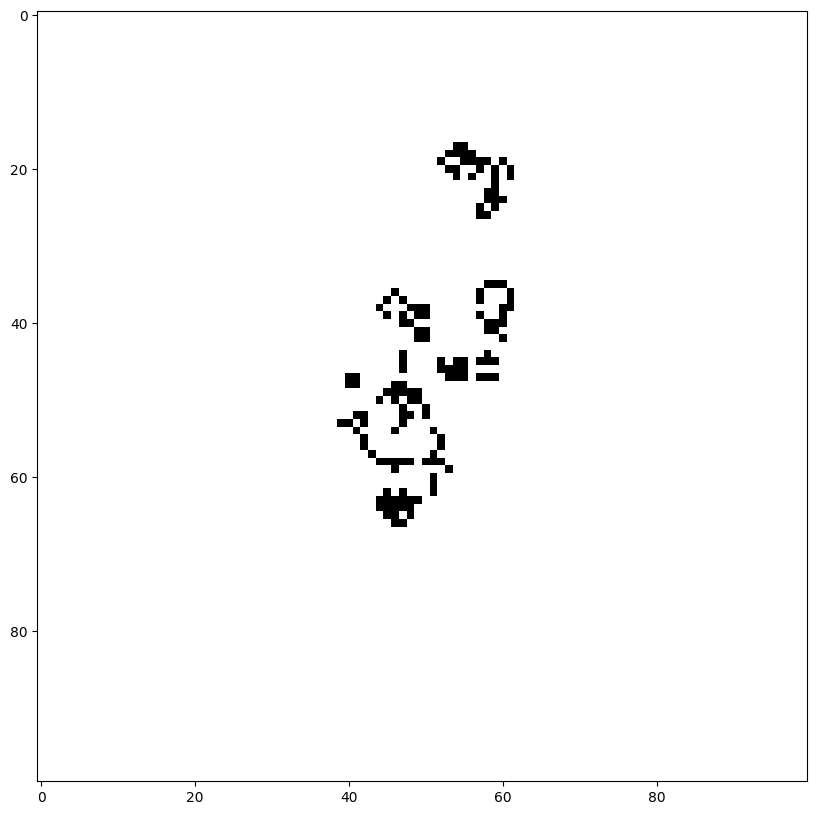

In [ ]:
num_turns = 50
new_universe = universe
for _ in range(num_turns):
    new_universe = pass_time(new_universe)
    plt.figure(figsize= (10, 10))
    plt.imshow(new_universe, cmap="Grays")
    plt.show()
    sleep(0.01)
    clear_output(wait=True)
